# Preço de imoveis

**Objetivo**: estimar os preços de imóveis
 * Identificar aspectos que contribuem para precificação dos imoveis
 * Entender qual aspecto é mais relevante, qual influencia mais no preço do imóvel.
 * Precificar um imóvel novo.

Base de dados simplificada e inspirada em [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# 1. Ajustando uma reta

## Conhecendo os dados

In [1]:
import pandas as pd

In [2]:
#Lendo dados
dados = pd.read_csv('C:\\Users\\joaoc\\OneDrive\\Documentos\\Aprendizado_ONE\\formacao-tech-foundation\\curso14_data_science_testando_relacoes_com_regressao_linear\\Preços_de_casas.csv')

In [3]:
#Quais fatores coletados?

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [4]:
dados = dados.drop(columns = 'Id')

## Correlação

Quais fatores estão relacionados ao preço da casa? Como é essa relação?

Com o coeficiente de Correlação de Pearson nos permite medir a relação linear entre variáveis, oferecendo uma escala que varia de -1 a 1, que interpretamos conforme sua intensidade e direção:

* -1: indica uma correlação negativa perfeita: à medida que uma variável aumenta, a outra diminui.
* 0: não há relação linear entre as variáveis.
* 1: correlação positiva perfeita: à medida que uma variável aumenta, a outra também aumenta.



In [5]:
# Correlação
corr = dados.corr()

In [6]:
corr['preco_de_venda']

area_primeiro_andar               0.616557
existe_segundo_andar              0.138541
area_segundo_andar                0.305311
quantidade_banheiros              0.563132
capacidade_carros_garagem         0.640214
qualidade_da_cozinha_Excelente    0.496223
preco_de_venda                    1.000000
Name: preco_de_venda, dtype: float64

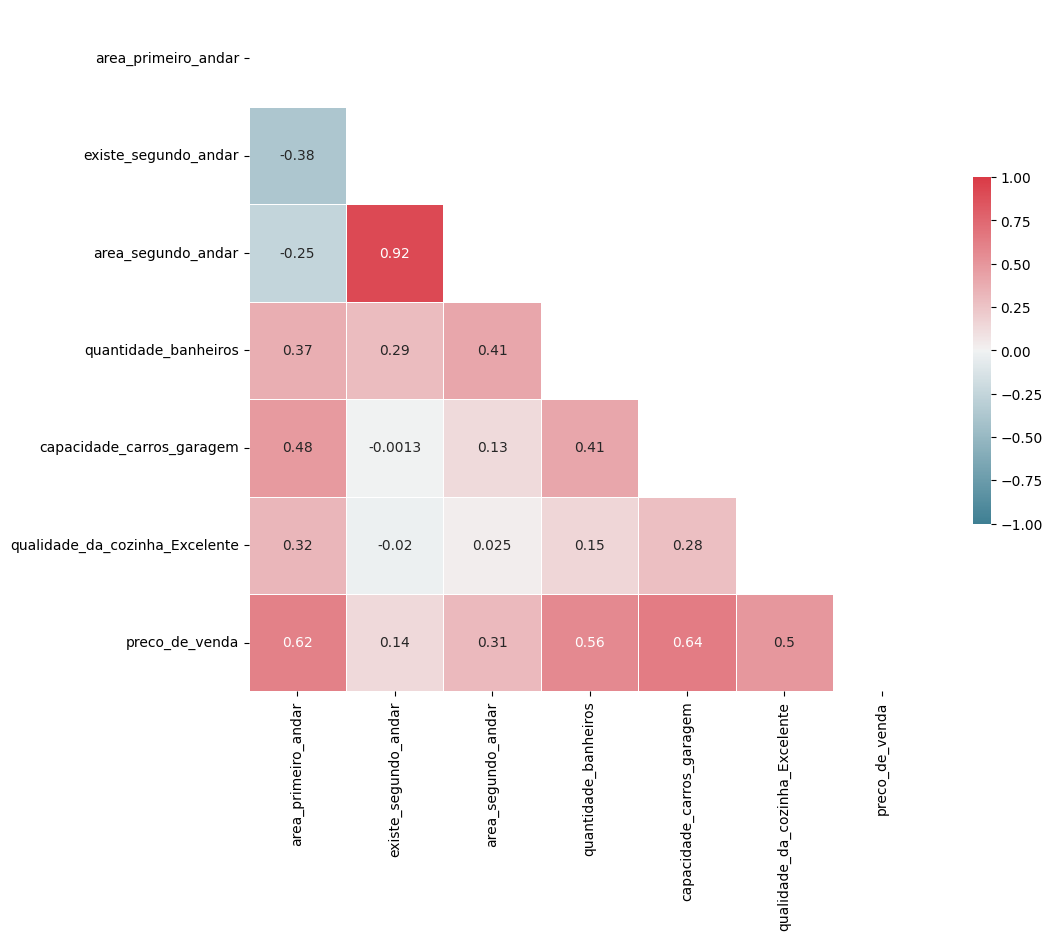

In [7]:
# Atividade
# Quais fatores estão mais correlacionados?
# Atividade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Quais fatores estão mais correlacionados?

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()

## Relacionando variáveis

In [8]:
# importando as visualizações
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Text(0, 0.5, 'Preço de Venda (R$)')

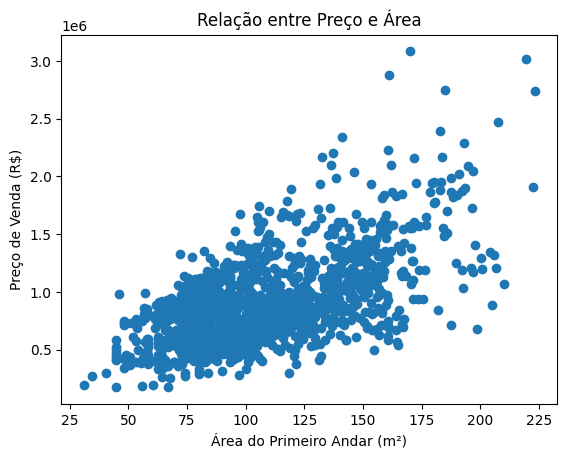

In [9]:
# Como é a relação entre área construida e o preço do imóvel?
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.title('Relação entre Preço e Área')
plt.xlabel('Área do Primeiro Andar (m²)')
plt.ylabel('Preço de Venda (R$)')


Text(0, 0.5, 'Preço de Venda (R$)')

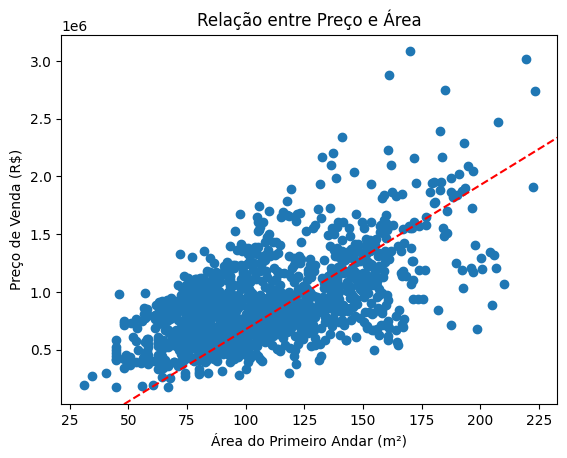

In [10]:
# Aparentemente quanto maior a área do primeiro andar, maior o preço da casa.
# E se quisermos traçar uma linha que melhor representa esse comportamento?
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.axline(xy1 = (66, 250000), xy2 = (190, 1800000), color='red', linestyle='--')
plt.title('Relação entre Preço e Área')
plt.xlabel('Área do Primeiro Andar (m²)')
plt.ylabel('Preço de Venda (R$)')




## Melhor reta

In [11]:
# Qual a reta que melhor se adequa a relação?
import statsmodels.api as sm
px.scatter(dados, x = 'area_primeiro_andar', y = 'preco_de_venda', trendline_color_override ='red', trendline ='ols')

# 2. Explicando a reta
Ajustamos uma reta entre o $m^2$ do primeiro andar e o preço da casa. Queremos explicar o preço da casa a partir do seu tamanho, por isso dizemos que:

* Variável explicativa/independente: Área do primeiro andar

* Variável resposta/dependente: Preço da casa

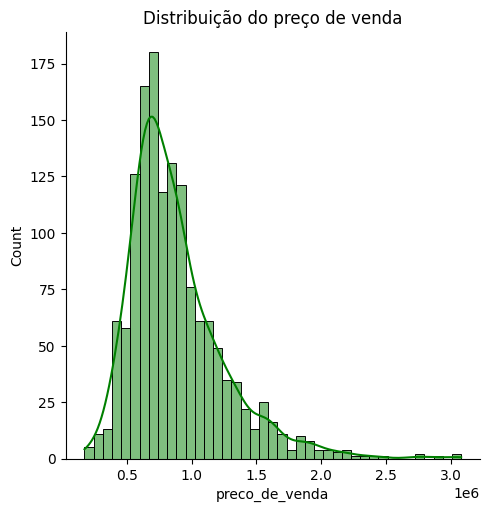

In [12]:
#Quem é nossa variável resposta?

sns.displot(dados['preco_de_venda'], kde=True, color='green')
plt.title('Distribuição do preço de venda')
plt.show()

### Separando em treino e teste

O conjunto de **treinamento** é usado para ajustar o modelo, enquanto o conjunto de **teste** é usado para avaliar seu desempenho em prever preços de casas não vistos durante o treinamento, que auxilia na generalização do modelo.

In [13]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [14]:
# Definindo y e X
y = dados['preco_de_venda']
X = dados.drop(columns=['preco_de_venda'])

In [15]:
#Aplicando o split do y e X
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230)

In [16]:
#Dados de treino para usar a fórmula
df_train = pd.DataFrame(data = x_train)
df_train['preco_de_venda'] = y_train

In [17]:
# import ols
from statsmodels.formula.api import ols

In [18]:
# ajustando o primeiro modelo
modelo_0 = ols('preco_de_venda ~ area_primeiro_andar', data=df_train).fit()

## Analisando os coeficientes

(intensidade, direção e significância)




In [19]:
# visualizando os parametros
modelo_0.params

Intercept              152909.288334
area_primeiro_andar      6793.641641
dtype: float64

In [20]:
# o resumo do nosso modelo
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Wed, 16 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        18:19:21   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.529e+05   3

* O **intercepto** é o valor esperado do preço da casa quando todas as outras variáveis são zero. Neste caso, quando todas as outras variáveis a área do primeiro andar é zero, o preço esperado da casa é de R$ 145.196,40. Nem sempre temos uma interpretação prática desse número.

* O **efeito individual** da área é 6833.97. Isso indica que para cada 1m² adicinado à área do primero andar espera-se que o preço da casa aumente em média R$6.833,97.

<img src="https://i.imgur.com/7Cm4Cot.png" width="500"/>


## Explicabilidade do modelo

Quanto a variação da área está explicando os diversos preços das casas?

Nesse caso recorremos a métrica R², o coeficiente de determinação. O R² varia de 0 a 1, onde 1 indica um ajuste perfeito do modelo aos dados, ou seja, todas as variações na variável dependente são explicadas pelas variáveis independentes no modelo. Por outro lado, um R² de 0 indica que o modelo não explica nenhuma variabilidade na variável dependente

In [21]:
# observando o R²
modelo_0.rsquared

np.float64(0.3772801099429788)

## Entendendo o resíduo

In [32]:
# Quem são os residuos
modelo_0.resid

1303   -193023.838744
326    -144522.356193
386     399612.747641
615     -68449.596607
236     166010.592859
            ...      
777     465872.680999
271    -497642.319788
723     461150.204718
560    -540482.733402
768     -37547.820756
Length: 1006, dtype: float64

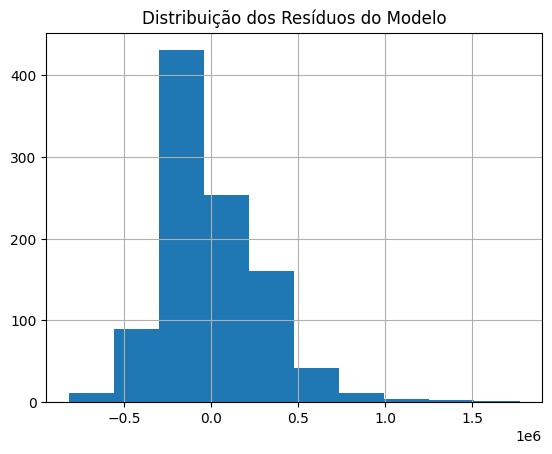

In [34]:
# Como eles estão distribuidos
modelo_0.resid.hist()
plt.title('Distribuição dos Resíduos do Modelo')
plt.show()

![](https://i.imgur.com/CJMdXpf.png)

## Obtendo o R² da previsão

In [35]:
# definindo o Y previsto
y_predict = modelo_0.predict(x_test)

In [36]:
# importando o r2_score
from sklearn.metrics import r2_score

In [37]:
# printando o r²
print('R²:', r2_score(y_test, y_predict))

R²: 0.38530928723202407


# 3. Adicionando outras características

O modelo com apenas um fator nos mostrou um R² de 0.37, ou seja, aproximadamente 37% da variação observada nos preços das casas pode ser explicada pela variação na área.
Isso indica que ainda há uma quantidade significativa de variação que não está sendo capturada por esse modelo específico.Vamos analisar outros fatores para explicar o preço das casas.

## Analisando os fatores

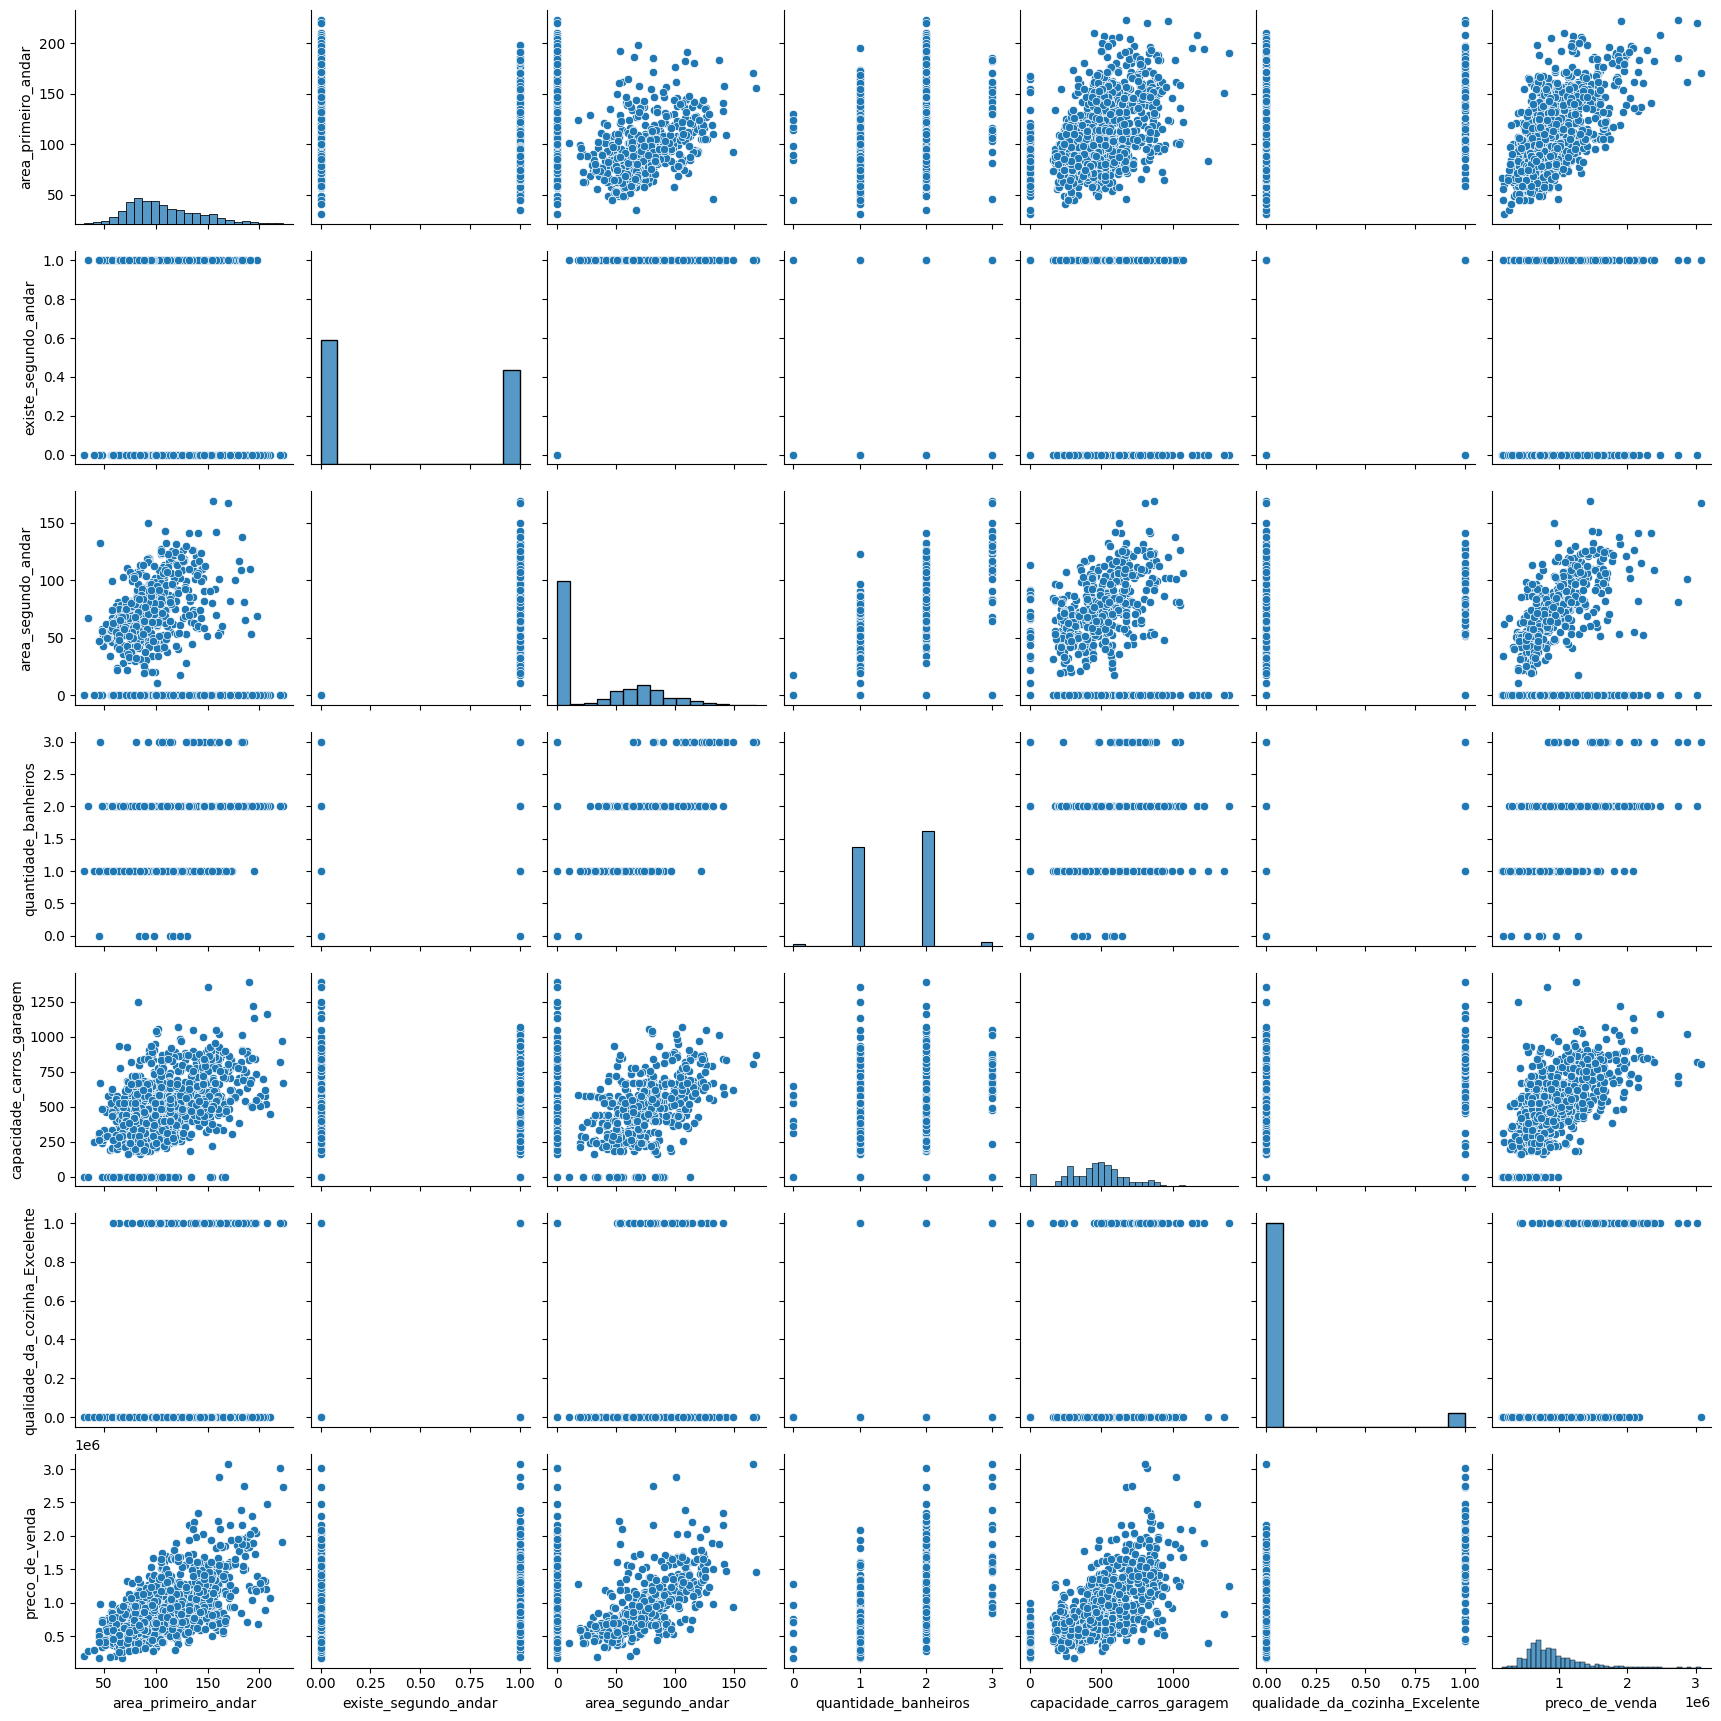

In [38]:
# quais outras características poderiam explicar o preço dos imóveis?
sns.pairplot(dados)

In [39]:
dados.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente', 'preco_de_venda'],
      dtype='object')

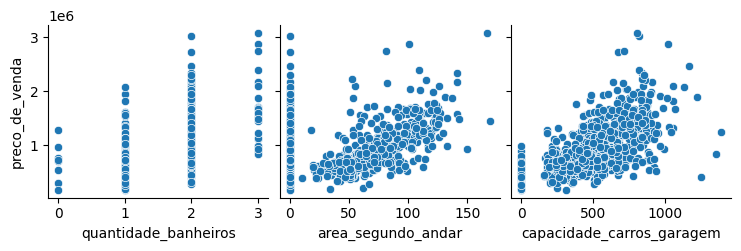

In [43]:
#Vamos olhar apenas com y_vars='preco_de_venda'
sns.pairplot(dados, y_vars='preco_de_venda', x_vars=['quantidade_banheiros', 'area_segundo_andar', 'capacidade_carros_garagem'])

## Adicionando fatores no modelo

In [29]:
# importando a api do statsmodels


In [30]:
# adicionando o constante



In [31]:
# Criando o modelo de regressão (sem fómula): saturado
modelo_1 = sm.OLS(y_train,
                  X_train[]).fit()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2542288840.py, line 3)

In [ ]:
# Modelo sem a área do segundo andar
modelo_2 = sm.OLS(y_train,
                  X_train[]).fit()

In [ ]:
# Modelo sem informações sobre garagem
modelo_3 = sm.OLS(y_train,
                  X_train[]).fit()

In [ ]:
# Resumo do modelo 1


In [ ]:
# Resumo do modelo 2


In [ ]:
# Resumo do modelo 3


## Comparando modelos
Qual o melhor modelo?


In [ ]:
print("R²")






In [ ]:
#Quantos parametros estão no modelo?




# 4. Precificando as casas

## Obtendo o R² da previsão

In [ ]:
# Adicionando uma constante em X_test



In [ ]:
# Prevendo com o modelo 3


In [ ]:
# Qual o r² da previsão?



In [ ]:
# Qual o R² do treino?



## Precificando uma casa


<img src="https://i.imgur.com/e4gytI1.png" width="800"/>

In [ ]:
#Novo imovel







In [ ]:
# Qual o preço desse imóvel com o modelo 0?



In [ ]:
# Qual o preço desse imóvel com o modelo 3?



## Precificando várias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [ ]:
# Lendo várias casas?



In [ ]:
# Adicionando uma constante



In [ ]:
# Qual o preço dessas novas casas?



# 5. Investigando o modelo





## Multicolinearidade


Quando duas ou mais coisas que você está tentando estudar são tão parecidas que é difícil dizer o quanto cada uma delas está influenciando o resultado.

In [ ]:
# import do VIF do statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
explicativas_1 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']

explicativas_2 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente']

explicativas_3 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']

In [ ]:
# VIF 1



In [ ]:
# VIF 3


## Análise dos resíduos

Resíduos: a discrepância entre os valores reais e os valores que o modelo prevê para os mesmos pontos de dados.

In [ ]:
# Prevendo os valores do treino X_train[explicativas_3]



In [ ]:
# Fazendo um scatter plot entre y_previsto e y_train

fig = px.scatter(x=     , y=      ,
                 title='Previsão X Real',
                 labels={'x':'Preço previsto','y':'Preço real'})
fig.show()

In [ ]:
# Residuos


In [ ]:
ax = sns.scatterplot(x=       , y=        , s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço da Casa - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

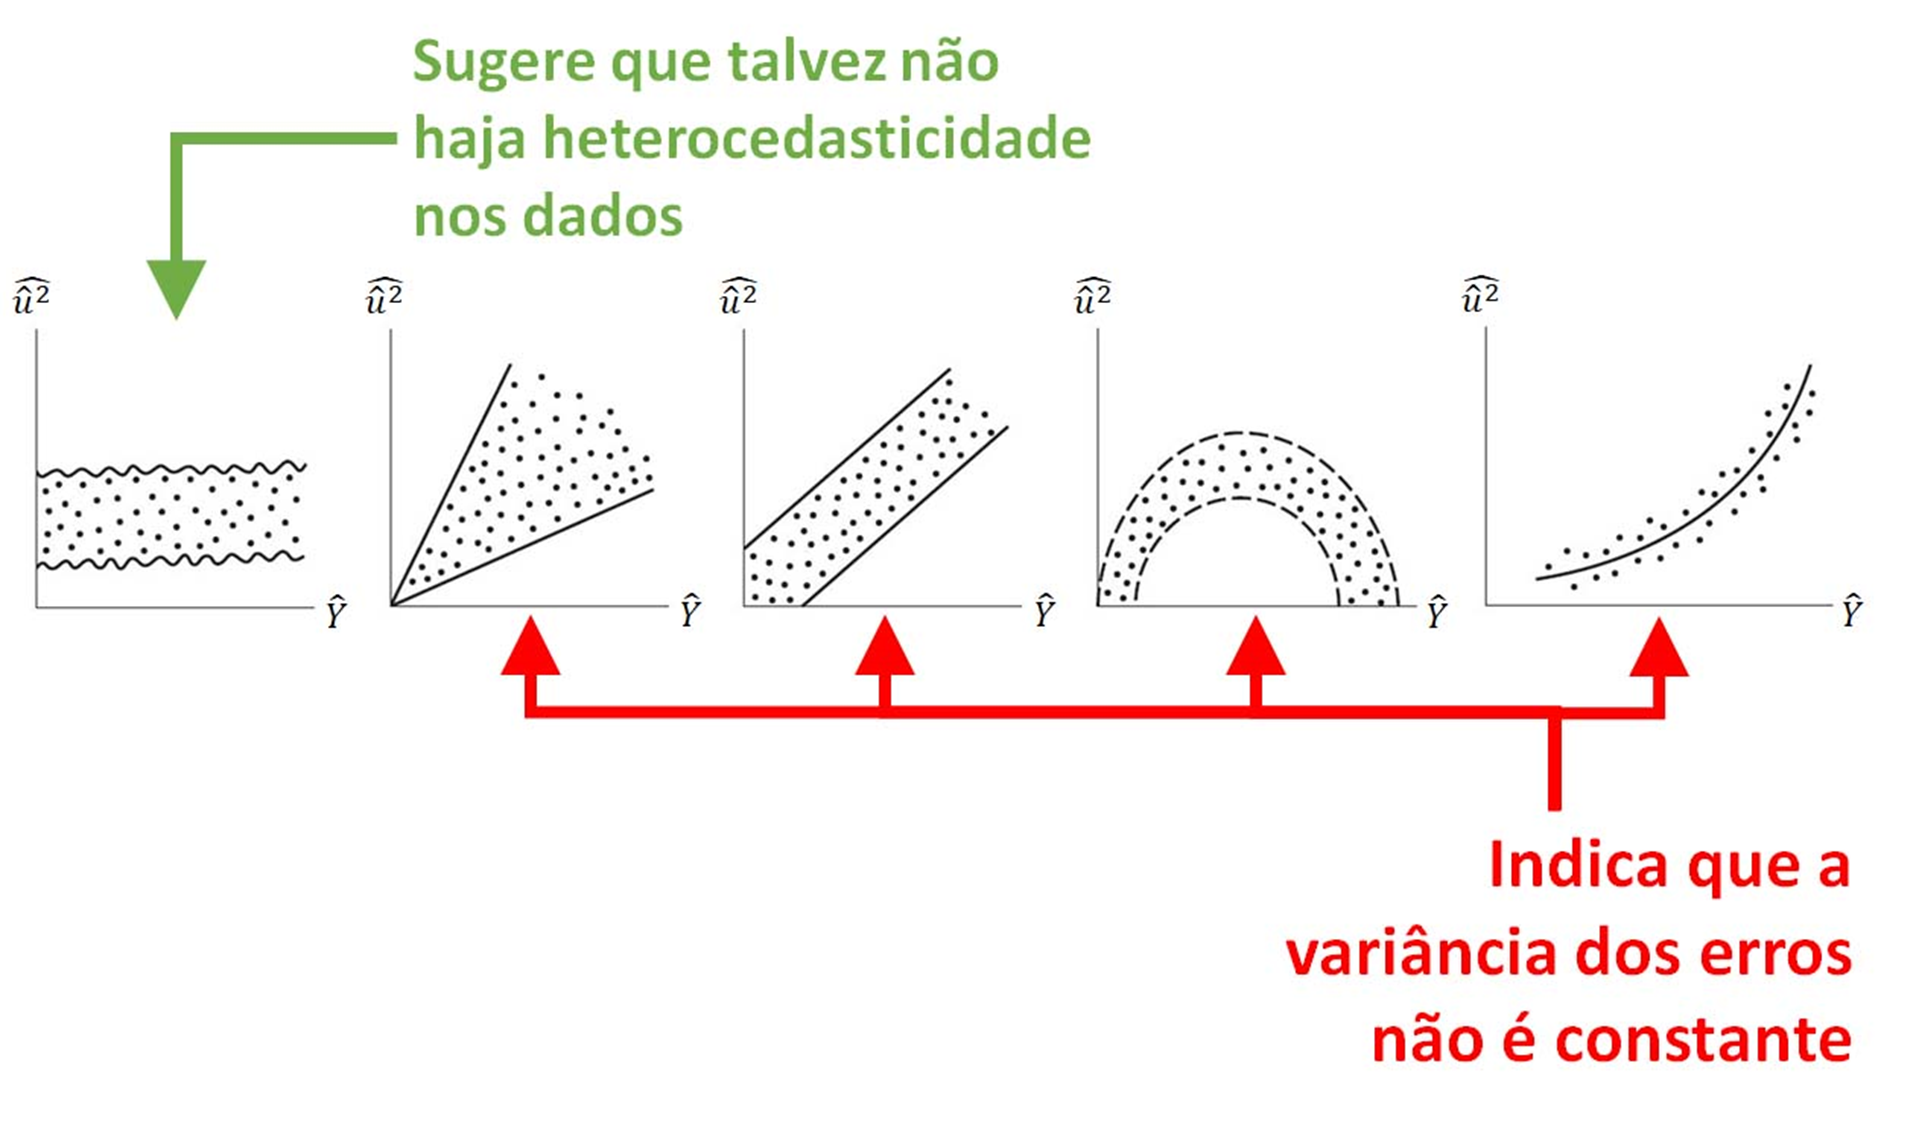